In [1]:
#test LSTM  input 4D  open high low close
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

print("now =", datetime.now())

now = 2020-08-31 18:17:36.036707


In [2]:
#load data and insert header ['Index','Time','Open','High','Low','Close','Volume']
H_=['Date','Time','Open','High','Low','Close','Volume']

data_Mn=pd.read_csv('data/EURUSDm43200.csv', names = H_)
data_Wk=pd.read_csv('data/EURUSDm10080.csv', names = H_)
data_D=pd.read_csv('data/EURUSDm1440.csv', names = H_)
print("now =", datetime.now())

now = 2020-08-31 18:17:38.271835


In [3]:
print(type(data_Mn),'Mn.shape=',data_Mn.shape)
print(type(data_Wk),'Wk.shape=',data_Wk.shape)
print(type(data_D),'D.shape=',data_D.shape)
print(data_D.info())
print(data_Wk.info())
print(data_Mn.info())


def chkD_1_7(i, j):    # i=D_index       j=Wk_index
    D = data_D['Date'][i]
    D = int(D[8:10])
    Wk = data_Wk['Date'][j]
    Wk = int(Wk[8:10])
    diff = D-Wk
    
    if 1<=diff and diff<=7 :   return True
    else:   return False

def compare_ym_D_M(i,j):    #compare_ym_D_M(D_index, Mn_index)
    ym_D=data_D['Date'][i]
    ym_D = ym_D[0:7]
    ym_Mn=data_Mn['Date'][j]
    ym_Mn = ym_Mn[0:7]
    
    if ym_D == ym_Mn:  return True
    else:  return False

<class 'pandas.core.frame.DataFrame'> Mn.shape= (264, 7)
<class 'pandas.core.frame.DataFrame'> Wk.shape= (874, 7)
<class 'pandas.core.frame.DataFrame'> D.shape= (1227, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1227 non-null   object 
 1   Time    1227 non-null   object 
 2   Open    1227 non-null   float64
 3   High    1227 non-null   float64
 4   Low     1227 non-null   float64
 5   Close   1227 non-null   float64
 6   Volume  1227 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 67.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    874 non-null    object 
 1   Time    874 non-null    object 
 2   Open    874 non-null    float64
 3   High    874 non-null    floa

In [4]:
#============ predata from MTF  to  predict [HLC_D]  6 days
#
Mn_index, Wk_index, D_index = 0, 0, 0
pre_data_All=[]

while True:   # Mn_index start
    if compare_ym_D_M(D_index, Mn_index):break
    else: 
        Mn_index+=1
        if Mn_index == len(data_Mn): break

while True:    # Wk_index start
    if data_Wk['Date'][Wk_index] < data_D['Date'][D_index] and data_D['Date'][D_index] <= data_Wk['Date'][Wk_index+1]: break
    else:
        Wk_index+=1
        if Wk_index == len(data_Wk): break

print('D_index start =', D_index)
print('Wk_index start =', Wk_index)
print('Mn_index start =', Mn_index)
print('')

while True:    
    if Mn_index == len(data_Mn): break
    if Wk_index == len(data_Wk): break
    if D_index == len(data_D): break
        
    #print('chk Mn vs D', Mn_index)
    if compare_ym_D_M(D_index, Mn_index):
        if Wk_index == len(data_Wk['Date'])-1: break
        while True:
            if data_Wk['Date'][Wk_index] < data_D['Date'][D_index] and data_D['Date'][D_index] <= data_Wk['Date'][Wk_index+1] :
                
            
                pre_data_All.append(data_Mn['Open'][Mn_index])
                pre_data_All.append(data_Mn['High'][Mn_index])
                pre_data_All.append(data_Mn['Low'][Mn_index])
                pre_data_All.append(data_Mn['Close'][Mn_index])

                pre_data_All.append(data_Wk['Open'][Wk_index])
                pre_data_All.append(data_Wk['High'][Wk_index])
                pre_data_All.append(data_Wk['Low'][Wk_index])
                pre_data_All.append(data_Wk['Close'][Wk_index])

                pre_data_All.append(data_D['Open'][D_index])
                pre_data_All.append(data_D['High'][D_index])
                pre_data_All.append(data_D['Low'][D_index])
                pre_data_All.append(data_D['Close'][D_index])
                
                #print('Mn--------', Mn_index, '  Wk--------', Wk_index, '  D---------', D_index)
                
      
                #print('Mn-', Mn_index, data_Mn['Date'][Mn_index], '  Wk-', Wk_index, data_Wk['Date'][Wk_index], '  D-', D_index, data_D['Date'][D_index])
            
                D_index += 1
                break                    

            else:    # esle of if chk  Date > wk
                Wk_index += 1
                break 
                
    else: Mn_index+=1
    
    #print('while loop outer ', 'Mn=', Mn_index, '   Wk=', Wk_index, '   D=', D_index)
    pass    



while True:
    if compare_ym_D_M(D_index, Mn_index):
        
        pre_data_All.append(data_Mn['Open'][Mn_index])
        pre_data_All.append(data_Mn['High'][Mn_index])
        pre_data_All.append(data_Mn['Low'][Mn_index])
        pre_data_All.append(data_Mn['Close'][Mn_index])

        pre_data_All.append(data_Wk['Open'][Wk_index])
        pre_data_All.append(data_Wk['High'][Wk_index])
        pre_data_All.append(data_Wk['Low'][Wk_index])
        pre_data_All.append(data_Wk['Close'][Wk_index])

        pre_data_All.append(data_D['Open'][D_index])
        pre_data_All.append(data_D['High'][D_index])
        pre_data_All.append(data_D['Low'][D_index])
        pre_data_All.append(data_D['Close'][D_index])        
        
        
        #print('Mn-', Mn_index, data_Mn['Date'][Mn_index], '  Wk-', Wk_index, data_Wk['Date'][Wk_index], '  D-', D_index, data_D['Date'][D_index])
        
        D_index+=1
        if D_index == len(data_D): break

print('')
print(datetime.now())   



#---------------------  array  (none, 12)------------------------------
print('len pre_data_All  = ',len(pre_data_All))
print('')

print(pre_data_All[:36])
print(pre_data_All[-36:])

pre_data_All = np.asarray(pre_data_All).reshape( int(len(pre_data_All)/12), 12 ) 
print(pre_data_All)
print(pre_data_All.shape)

print('')
print(pre_data_All[:3,:])

print('D_index stop =', D_index)
print('Wk_index stop =', Wk_index)
print('Mn_index stop =', Mn_index)

D_index start = 0
Wk_index start = 667
Mn_index start = 215


2020-08-31 18:17:51.929616
len pre_data_All  =  14724

[1.11337, 1.14265, 1.09112, 1.11019, 1.13477, 1.14265, 1.09112, 1.10384, 1.13258, 1.14265, 1.1267399999999999, 1.1331799999999999, 1.11337, 1.14265, 1.09112, 1.11019, 1.13477, 1.14265, 1.09112, 1.10384, 1.13293, 1.13362, 1.09112, 1.1088200000000001, 1.11337, 1.14265, 1.09112, 1.11019, 1.13477, 1.14265, 1.09112, 1.10384, 1.1047799999999999, 1.10738, 1.10104, 1.10384]
[1.11155, 1.13832, 1.11, 1.13157, 1.11155, 1.13832, 1.11, 1.13157, 1.12347, 1.13619, 1.11943, 1.13351, 1.11155, 1.13832, 1.11, 1.13157, 1.11155, 1.13832, 1.11, 1.13157, 1.13352, 1.13832, 1.12781, 1.1290799999999999, 1.11155, 1.13832, 1.11, 1.13157, 1.11155, 1.13832, 1.11, 1.13157, 1.1293799999999998, 1.13192, 1.12905, 1.13157]
[[1.11337 1.14265 1.09112 ... 1.14265 1.12674 1.13318]
 [1.11337 1.14265 1.09112 ... 1.13362 1.09112 1.10882]
 [1.11337 1.14265 1.09112 ... 1.10738 1.10104 1.10384]
 ...
 [1.11155 1.138

In [5]:
# ================predata LSTM form==================
#-===============---- จัดเรียงข้อมูล  Mn-----================
X_train_Mn=[]
Y_train_Mn=[]
X_predict_Mn=[]
windows=20

for i in range(windows, len(pre_data_All)-1) :
    
    # ------------------------------------ predata LSTM Form ----------------------------------
        X_train_Mn.append(pre_data_All[i-windows:i,:])                      # input     Mn  Wk  D  [OHLC]
        Y_train_Mn.append(pre_data_All[i:i+2,9:])                             # output    Mn [HLC]
     
            #------ to 3D input LSTM ------------

X_train_Mn, X_predict_Mn, Y_train_Mn = np.array(X_train_Mn), np.array(X_predict_Mn), np.array(Y_train_Mn)

print('X_train_Mn.shape=',X_train_Mn.shape)
print('X_predict_Mn.shape=',X_predict_Mn.shape)
print('Y_train_Mn.shape=',Y_train_Mn.shape)

X_train_Mn=np.reshape(X_train_Mn, (X_train_Mn.shape[0], X_train_Mn.shape[1], X_train_Mn.shape[2]))

print(X_train_Mn.shape)
print('X_train_Mn ',X_train_Mn)
print('Y_train_Mn ',Y_train_Mn)

X_train_Mn.shape= (1206, 20, 12)
X_predict_Mn.shape= (0,)
Y_train_Mn.shape= (1206, 2, 3)
(1206, 20, 12)
X_train_Mn  [[[1.11337 1.14265 1.09112 ... 1.14265 1.12674 1.13318]
  [1.11337 1.14265 1.09112 ... 1.13362 1.09112 1.10882]
  [1.11337 1.14265 1.09112 ... 1.10738 1.10104 1.10384]
  ...
  [1.11032 1.11958 1.09511 ... 1.11192 1.10413 1.10943]
  [1.11032 1.11958 1.09511 ... 1.11641 1.10881 1.11056]
  [1.11032 1.11958 1.09511 ... 1.11464 1.10241 1.10296]]

 [[1.11337 1.14265 1.09112 ... 1.13362 1.09112 1.10882]
  [1.11337 1.14265 1.09112 ... 1.10738 1.10104 1.10384]
  [1.11337 1.14265 1.09112 ... 1.10829 1.09702 1.10129]
  ...
  [1.11032 1.11958 1.09511 ... 1.11641 1.10881 1.11056]
  [1.11032 1.11958 1.09511 ... 1.11464 1.10241 1.10296]
  [1.11032 1.11958 1.09511 ... 1.10591 1.1044  1.10548]]

 [[1.11337 1.14265 1.09112 ... 1.10738 1.10104 1.10384]
  [1.11337 1.14265 1.09112 ... 1.10829 1.09702 1.10129]
  [1.11337 1.14265 1.09112 ... 1.11109 1.10118 1.10747]
  ...
  [1.11032 1.11958 1.0

In [6]:
# ================predata LSTM form==================
#-===============---- จัดเรียงข้อมูล  Wk-----================
X_train_Wk=[]
Y_train_Wk=[]
X_predict_Wk=[]
windows=20

for i in range(windows, len(pre_data_All)-4) :
    
    # ------------------------------------ predata LSTM Form ----------------------------------
        X_train_Wk.append(pre_data_All[i-windows:i,:])                      # input     Mn  Wk  D  [OHLC]
        Y_train_Wk.append(pre_data_All[i:i+4,9:])                             # output    Wk1 - Wk4  [HLC]
     
            #------ to 3D input LSTM ------------

X_train_Wk, X_predict_Wk, Y_train_Wk = np.array(X_train_Wk), np.array(X_predict_Wk), np.array(Y_train_Wk)

print('X_train_Wk.shape=',X_train_Wk.shape)
print('X_predict_Wk.shape=',X_predict_Wk.shape)
print('Y_train_Wk.shape=',Y_train_Wk.shape)

X_train_Wk=np.reshape(X_train_Wk, (X_train_Wk.shape[0], X_train_Wk.shape[1], X_train_Wk.shape[2]))

print(Y_train_Wk.shape)
print(Y_train_Wk.shape[1], Y_train_Wk.shape[2])

X_train_Wk.shape= (1203, 20, 12)
X_predict_Wk.shape= (0,)
Y_train_Wk.shape= (1203, 4, 3)
(1203, 4, 3)
4 3


In [6]:
# ================predata LSTM form==================
#-===============---- จัดเรียงข้อมูล  D-----================
X_train_D=[]
Y_train_D=[]
X_predict_D=[]
windows=20

for i in range(windows, len(pre_data_All)-6) :
    
    # ------------------------------------ predata LSTM Form ----------------------------------
        X_train_D.append(pre_data_All[i-windows:i,:])                      # input     Mn  Wk  D  [OHLC]
        Y_train_D.append(pre_data_All[i:i+6,9:])                             # output    D1-D6  [HLC]
     
            #------ to 3D input LSTM ------------

X_train_D, X_predict_D, Y_train_D = np.array(X_train_D), np.array(X_predict_D), np.array(Y_train_D)

print('X_train_D.shape=',X_train_D.shape)
print('X_predict_D.shape=',X_predict_D.shape)
print('Y_train_D.shape=',Y_train_D.shape)

X_train_D=np.reshape(X_train_D, (X_train_D.shape[0], X_train_D.shape[1], X_train_D.shape[2]))

print(Y_train_D.shape)
print(Y_train_D.shape[1], Y_train_D.shape[2])

X_train_D.shape= (1201, 20, 12)
X_predict_D.shape= (0,)
Y_train_D.shape= (1201, 6, 3)
(1201, 6, 3)
6 3


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from keras.models import load_model
from keras.callbacks import ModelCheckpoint

print(datetime.now())

Using TensorFlow backend.


2020-08-28 17:45:35.565226


In [8]:
#============ Model LSTM  predict Mn ================
n_node=300    # node unit     Mn Wk D
D_O=0.25         # Drop Out   Mn Wk D
ep_All=10            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_Mn.shape[1]
n_features_input = X_train_Mn.shape[2]
n_step_out =  Y_train_Mn.shape[1]
n_features_output = Y_train_Mn.shape[2]

model_Mn = Sequential()
model_Mn.add(LSTM(n_node, activation='relu', input_shape=(n_step_in, n_features_input)))
model_Mn.add(RepeatVector(n_step_out))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(n_node, activation='relu', return_sequences=True))
model_Mn.add(Dropout(D_O))

model_Mn.add(LSTM(n_node, activation='relu', return_sequences=True))
model_Mn.add(Dropout(D_O))
# output  time series  of  date
model_Mn.add(TimeDistributed(Dense(n_features_output)))

model_Mn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_Mn = "model_Mn.h5"
checkpoint = ModelCheckpoint(filepath_Mn, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model_Mn.fit(X_train_Mn, Y_train_Mn, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('....................................... End Mn .....................................................')

print('time model_All = ', time_2 - time_1)

Z_Mn=model_Mn.predict(X_train_Mn)
print(Z_Mn)

Train on 1025 samples, validate on 181 samples
Epoch 1/10
1025/1025 [==============================] - 4s 4ms/step - loss: 0.9716 - accuracy: 0.5054 - val_loss: 0.7774 - val_accuracy: 0.0000e+00

Epoch 00001: loss improved from inf to 0.97164, saving model to model_Mn.h5
Epoch 2/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.4186 - accuracy: 0.2302 - val_loss: 0.2149 - val_accuracy: 1.0000

Epoch 00002: loss improved from 0.97164 to 0.41865, saving model to model_Mn.h5
Epoch 3/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.1426 - accuracy: 0.5015 - val_loss: 0.0085 - val_accuracy: 0.0000e+00

Epoch 00003: loss improved from 0.41865 to 0.14258, saving model to model_Mn.h5
Epoch 4/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.0223 - accuracy: 0.3824 - val_loss: 0.0072 - val_accuracy: 0.0000e+00

Epoch 00004: loss improved from 0.14258 to 0.02232, saving model to model_Mn.h5
Epoch 5/10
1025/1025 [=======================

In [9]:
# ------------------------load the model--------------------------
filepath_Mn = "model_Mn.h5"
re_model_Mn = load_model(filepath_Mn)

# fit the model
checkpoint = ModelCheckpoint(filepath_Mn, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

re_model_Mn.fit(X_train_Mn, Y_train_Mn, epochs=1, batch_size=50, callbacks=callbacks_list)

Epoch 1/1
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0093 - accuracy: 0.3653

Epoch 00001: loss improved from inf to 0.00927, saving model to model_Mn.h5


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


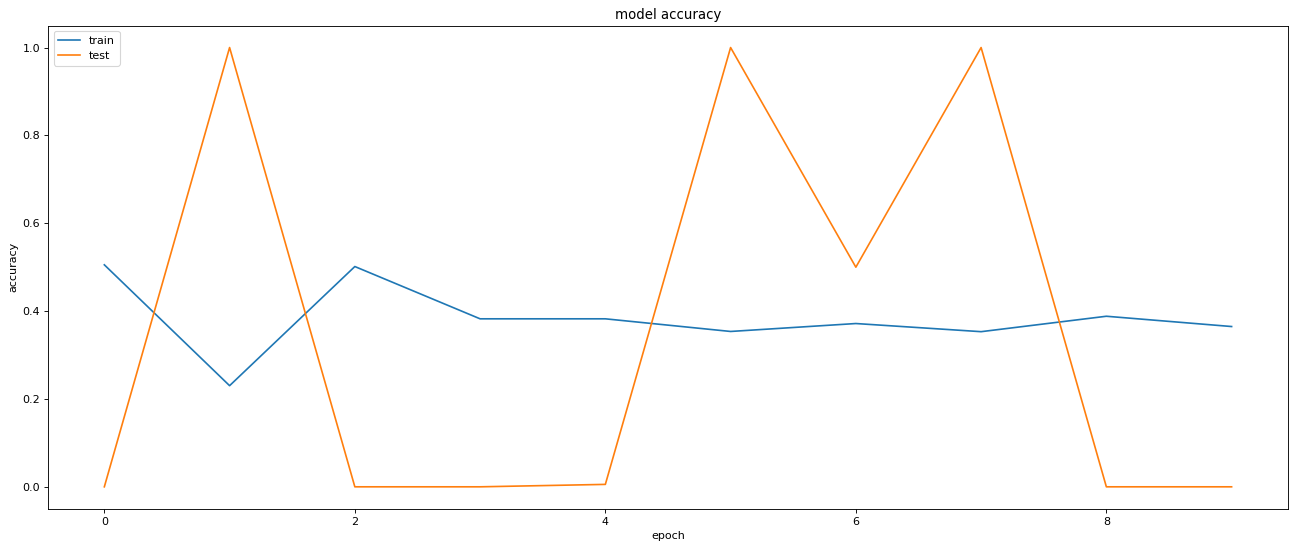

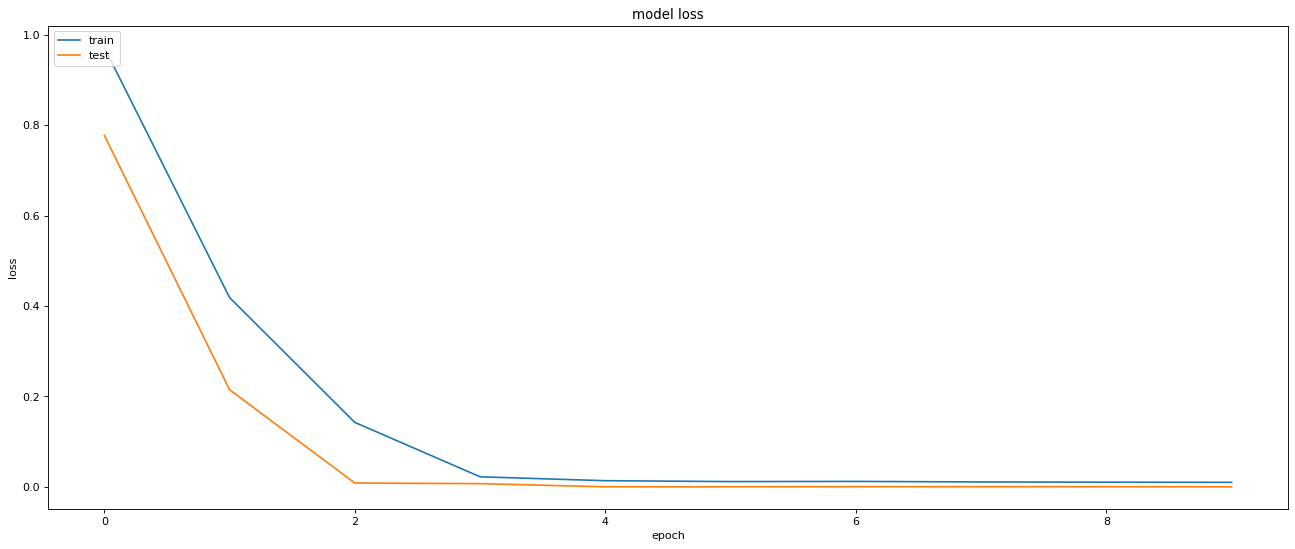

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               375600    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 2, 300)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 300)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 300)            721200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 300)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 300)            721200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 300)           

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=[20,8],dpi=80)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=[20,8],dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_Mn.summary()

In [12]:
#============ Model LSTM  predict Wk1 - Wk4  ================
n_node=300    # node unit     Mn Wk D
D_O=0.25         # Drop Out   Mn Wk D
ep_All=10            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_Wk.shape[1]
n_features_input = X_train_Wk.shape[2]
n_step_out =  Y_train_Wk.shape[1]
n_features_output = Y_train_Wk.shape[2]

model_Wk = Sequential()
model_Wk.add(LSTM(n_node, activation='relu', input_shape=(n_step_in, n_features_input)))
model_Wk.add(RepeatVector(n_step_out))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(n_node, activation='relu', return_sequences=True))
model_Wk.add(Dropout(D_O))

model_Wk.add(LSTM(n_node, activation='relu', return_sequences=True))
model_Wk.add(Dropout(D_O))
# output  time series  of  date
model_Wk.add(TimeDistributed(Dense(n_features_output)))

model_Wk.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_Wk = "model_Wk.h5"
checkpoint = ModelCheckpoint(filepath_Wk, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model_Wk.fit(X_train_Wk, Y_train_Wk, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('....................................... End Wk .....................................................')

print('time model_All = ', time_2 - time_1)

Z_Wk=model_Wk.predict(X_train_Wk)
print(Z_Wk)

NameError: name 'X_train_Wk' is not defined

In [30]:
# ------------------------load the model--------------------------
filepath_Wk = "model_Wk.h5"
re_model_Wk = load_model(filepath_Wk)

# fit the model
checkpoint = ModelCheckpoint(filepath_Wk, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

re_model_Wk.fit(X_train_Wk, Y_train_Wk, epochs=1, batch_size=50, callbacks=callbacks_list)

Epoch 1/1
1203/1203 [==============================] - 5s 4ms/step - loss: 0.7668 - accuracy: 0.1158

Epoch 00001: loss improved from inf to 0.76679, saving model to model_Wk.h5


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


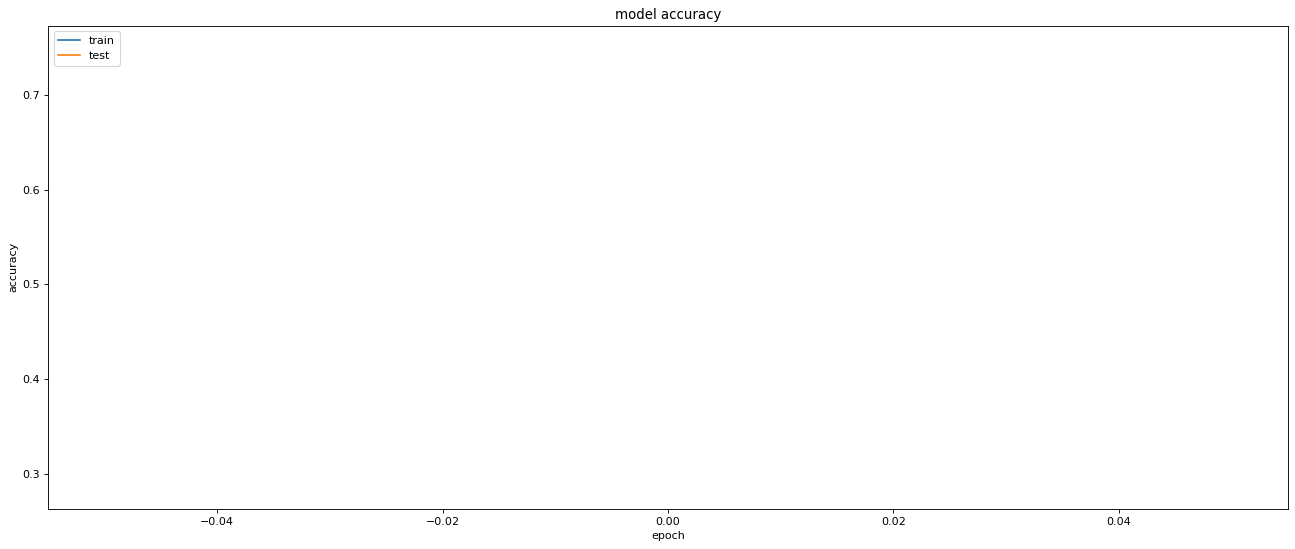

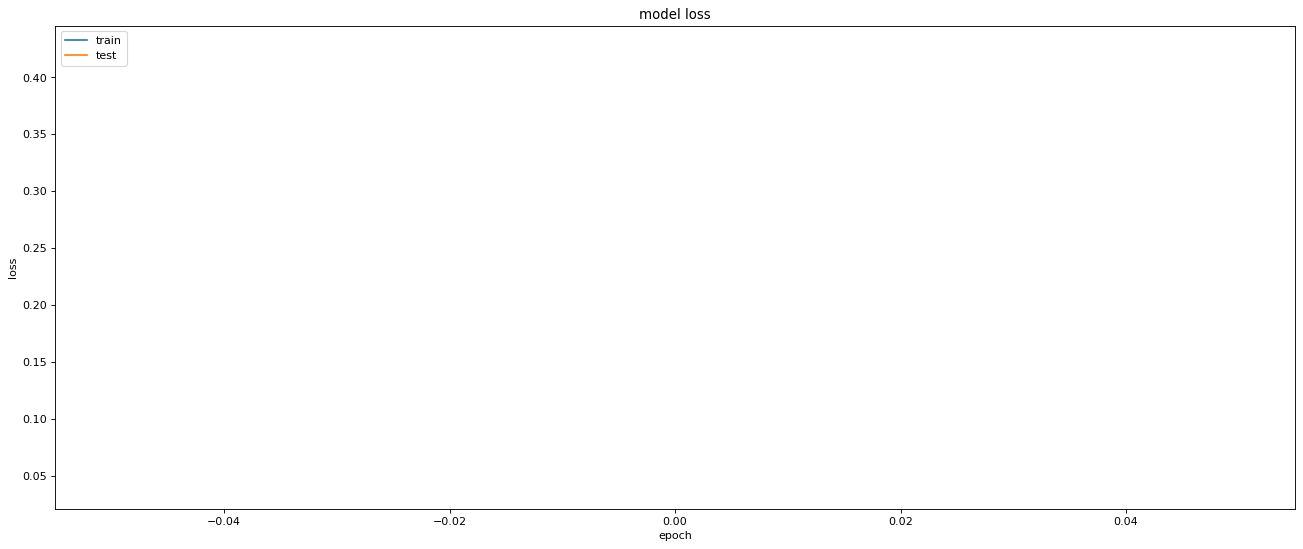

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 300)               375600    
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 4, 300)            0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 4, 300)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 4, 300)            721200    
_________________________________________________________________
dropout_23 (Dropout)         (None, 4, 300)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 4, 300)            721200    
_________________________________________________________________
dropout_24 (Dropout)         (None, 4, 300)           

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=[20,8],dpi=80)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=[20,8],dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_Wk.summary()

In [31]:
#============ Model LSTM  predict D1 - D6 ================
n_node=300    # node unit     Mn Wk D
D_O=0.25         # Drop Out   Mn Wk D
ep_All=1            #epoch Mn Wk D

time_1=datetime.now()

n_step_in = X_train_D.shape[1]
n_features_input = X_train_D.shape[2]
n_step_out =  Y_train_D.shape[1]
n_features_output = Y_train_D.shape[2]

model_D = Sequential()
model_D.add(LSTM(n_node, activation='relu', input_shape=(n_step_in, n_features_input)))
model_D.add(RepeatVector(n_step_out))
model_D.add(Dropout(D_O))

model_D.add(LSTM(n_node, activation='relu', return_sequences=True))
model_D.add(Dropout(D_O))

model_D.add(LSTM(n_node, activation='relu', return_sequences=True))
model_D.add(Dropout(D_O))
# output  time series  of  date
model_D.add(TimeDistributed(Dense(n_features_output)))

model_D.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# define the checkpoint
filepath_D = "model_D.h5"
checkpoint = ModelCheckpoint(filepath_D, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model
history = model_D.fit(X_train_D, Y_train_D, validation_split=0.15, epochs=ep_All, verbose=1, batch_size=50, callbacks=callbacks_list)

time_2=datetime.now()

print('....................................... End Mn .....................................................')

print('time model_All = ', time_2 - time_1)

Z_D=model_D.predict(X_train_D)
print(Z_D)

Train on 1020 samples, validate on 181 samples
Epoch 1/1
1020/1020 [==============================] - 5s 5ms/step - loss: 1.2055 - accuracy: 0.4113 - val_loss: 1.0177 - val_accuracy: 0.8333

Epoch 00001: loss improved from inf to 1.20546, saving model to model_D.h5
....................................... End Mn .....................................................
time model_All =  0:00:07.376747
[[[0.03703495 0.03595529 0.03579871]
  [0.06079777 0.05842352 0.0586818 ]
  [0.08483693 0.08193881 0.08243919]
  [0.10729279 0.10484664 0.10543389]
  [0.12729739 0.12612599 0.12676051]
  [0.14456356 0.1452202  0.14595558]]

 [[0.03703222 0.03595299 0.035796  ]
  [0.0607907  0.05841754 0.05867542]
  [0.08482525 0.08192853 0.08242848]
  [0.1072769  0.1048317  0.10541905]
  [0.12727779 0.1261064  0.12674178]
  [0.14454073 0.1451963  0.14593323]]

 [[0.03702416 0.03594659 0.03579011]
  [0.0607702  0.05840117 0.05866028]
  [0.08479142 0.08190054 0.08240233]
  [0.10723023 0.10479181 0.10538194]
  [0

In [34]:
# ------------------------load the model--------------------------
filepath_D = 'model_D.h5'
re_model_D = load_model(filepath_D)

# fit the model
checkpoint = ModelCheckpoint(filepath_D, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list =[checkpoint]

re_model_D.fit(X_train_D, Y_train_D, epochs=1, batch_size=50, callbacks=callbacks_list)

Z_D=re_model_D.predict(X_train_D)
print(Z_D)

Epoch 1/1
1201/1201 [==============================] - 5s 4ms/step - loss: 0.4274 - accuracy: 0.2956

Epoch 00001: loss improved from inf to 0.42736, saving model to model_D.h5
[[[0.20598759 0.20666365 0.20022514]
  [0.41544402 0.4187963  0.4064636 ]
  [0.66598946 0.67319083 0.65809685]
  [0.94385225 0.9538785  0.9428905 ]
  [1.2401303  1.2496597  1.2531903 ]
  [1.5502818  1.5542125  1.5854638 ]]

 [[0.2059672  0.20664379 0.20020486]
  [0.41538674 0.41873997 0.40640622]
  [0.6658815  0.67308486 0.6579881 ]
  [0.94368273 0.95371294 0.94271773]
  [1.2398891  1.2494256  1.2529407 ]
  [1.549958   1.5539014  1.5851235 ]]

 [[0.20588402 0.20656155 0.20012602]
  [0.41515642 0.41851088 0.40618366]
  [0.6654547  0.67266    0.6575679 ]
  [0.9430182  0.9530555  0.94205254]
  [1.2389501  1.2485063  1.2519846 ]
  [1.5487067  1.5526927  1.5838264 ]]

 ...

 [[0.2047209  0.2053757  0.19900045]
  [0.41192418 0.4152129  0.40301007]
  [0.6594505  0.666554   0.65157825]
  [0.93367094 0.9436263  0.9325791

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


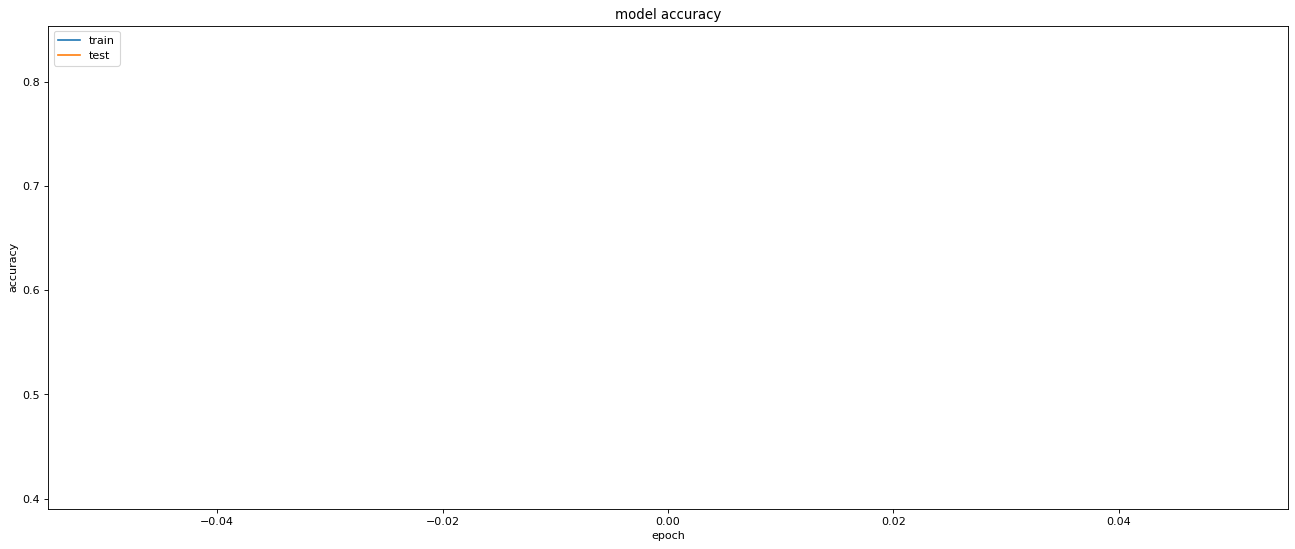

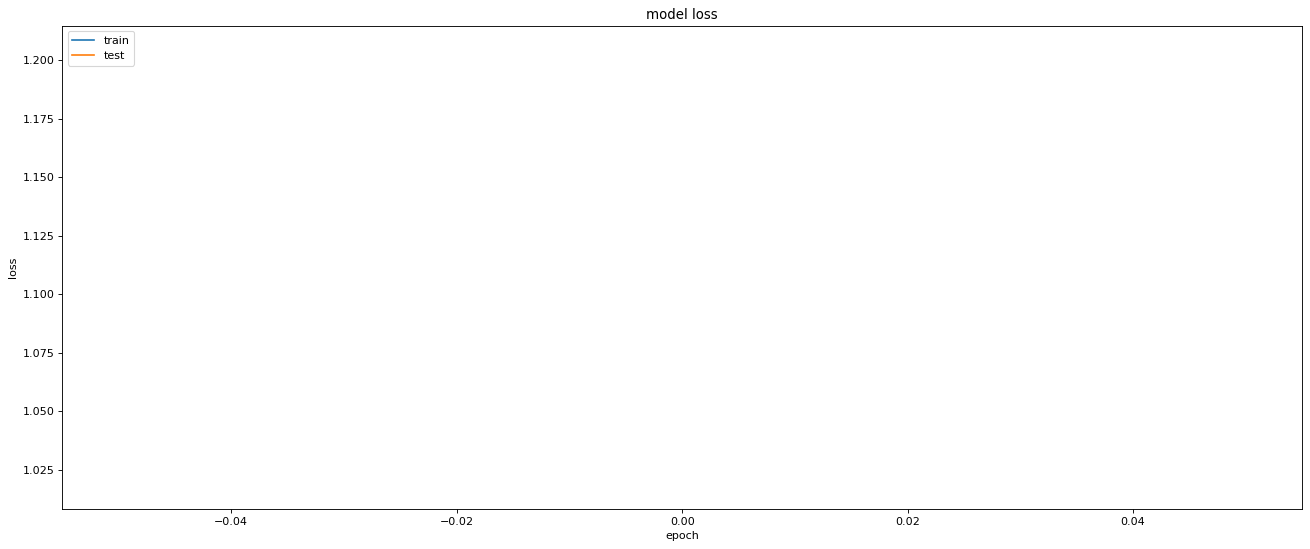

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 300)               375600    
_________________________________________________________________
repeat_vector_14 (RepeatVect (None, 6, 300)            0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 6, 300)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 6, 300)            721200    
_________________________________________________________________
dropout_41 (Dropout)         (None, 6, 300)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 6, 300)            721200    
_________________________________________________________________
dropout_42 (Dropout)         (None, 6, 300)          

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=[20,8],dpi=80)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=[20,8],dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model_D.summary()

In [36]:
#  ------------------------   Predict data  +  Save to  CSV file--------------------
#  model_Mn
# model_Wk
# model_D
# Save all to CSV

import csv

file_name = 'data/testdata4'
with open(file_name+'.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(Z_Mn[-1])
    writer.writerows(Z_Wk[-1])
    writer.writerows(Z_D[-1])

In [56]:
Y_train_Mn[-1,-1,:]

array([1.13192, 1.12905, 1.13157])

In [61]:
# --------------------------  plot graph --------------------------
#     Y_train_Mn   Y_train_Wk   Y_train_D     compare     Z_Mn    Z_Wk    Z_D
Sr_Y_Mn=[]
Sr_Y_Wk=[]
Sr_Y_D=[]

Sr_Z_Mn=[]
Sr_Z_Wk=[]
Sr_Z_D=[]

#  --------  Y_train_Mn  to  serie Y _Mn----------
for i in range(Y_train_Mn .shape[0]):
    if i==0: 
        for j in range(Y_train_Mn.shape[1]):
            Sr_Y_Mn.append(Y_train_Mn[i,j,:])
    else:
        Sr_Y_Mn.append(Y_train_Mn[i,-1,:])
        
print(np.array(Sr_Y_Mn).shape,'\n')
#  --------  Z_Mn  to  serie Z _Mn----------
for i in range(Z_Mn.shape[0]):
    if i==0: 
        for j in range(Z_Mn .shape[1]):
            Sr_Z_Mn.append(Z_Mn[i,j,:])
    else:
        Sr_Z_Mn.append(Z_Mn[i,-1,:])
print(np.array(Sr_Z_Mn).shape,'\n')

#  --------  Y_train_Wk  to  serie Y _Wk----------
for i in range(Y_train_Wk .shape[0]):
    if i==0: 
        for j in range(Y_train_Wk .shape[1]):
            Sr_Y_Wk.append(Y_train_Wk[i,j,:])
    else:
        Sr_Y_Wk.append(Y_train_Wk[i,-1,:])
print(np.array(Sr_Y_Wk).shape,'\n')
#  --------  Z_Wk  to  serie Z _Wk----------
for i in range(Z_Wk.shape[0]):
    if i==0: 
        for j in range(Z_Wk .shape[1]):
            Sr_Z_Wk.append(Z_Wk[i,j,:])
    else:
        Sr_Z_Wk.append(Z_Wk[i,-1,:])
print(np.array(Sr_Z_Wk).shape,'\n')

#  --------  Y_train_D  to  serie Y _D----------
for i in range(Y_train_D.shape[0]):
    if i==0: 
        for j in range(Y_train_D .shape[1]):
            Sr_Y_D.append(Y_train_D[i,j,:])
    else:
        Sr_Y_D.append(Y_train_D[i,-1,:])
print(np.array(Sr_Y_D).shape,'\n')
#  --------  Z_Mn  to  serie Z ----------
for i in range(Z_D.shape[0]):
    if i==0: 
        for j in range(Z_D.shape[1]):
            Sr_Z_D.append(Z_D[i,j,:])
    else:
        Sr_Z_D.append(Z_D[i,-1,:])
print(np.array(Sr_Z_D).shape,'\n')

# Serie data  to dataframe
df_Y_Mn = pd.DataFrame(Sr_Y_Mn, columns =['High', 'Low', 'Close'])
df_Z_Mn = pd.DataFrame(Sr_Z_Mn, columns =['High', 'Low', 'Close'])

df_Y_Wk = pd.DataFrame(Sr_Y_Wk, columns =['High', 'Low', 'Close'])
df_Z_Wk = pd.DataFrame(Sr_Z_Wk, columns =['High', 'Low', 'Close'])

df_Y_D = pd.DataFrame(Sr_Y_D, columns =['High', 'Low', 'Close'])
df_Z_D = pd.DataFrame(Sr_Z_D, columns =['High', 'Low', 'Close'])

print('Mn','\n')
df_Y_Mn.info()
df_Z_Mn.info()

print('Wk','\n')
df_Y_Wk.info()
df_Z_Wk.info()

print('D','\n')
df_Y_D.info()
df_Z_D.info()

print(df_Y_Mn)
print(df_Z_Mn)

print(df_Y_Wk)
print(df_Z_Wk)

print(df_Y_D)
print(df_Z_D)

(1207, 3) 

(1207, 3) 

(1206, 3) 

(1206, 3) 

(1206, 3) 

(1206, 3) 

Mn 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1207 non-null   float64
 1   Low     1207 non-null   float64
 2   Close   1207 non-null   float64
dtypes: float64(3)
memory usage: 28.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1207 non-null   float64
 1   Low     1207 non-null   float64
 2   Close   1207 non-null   float64
dtypes: float64(3)
memory usage: 28.4 KB
Wk 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1206 non-null   float64
 1   Low     1206 non-null   float64


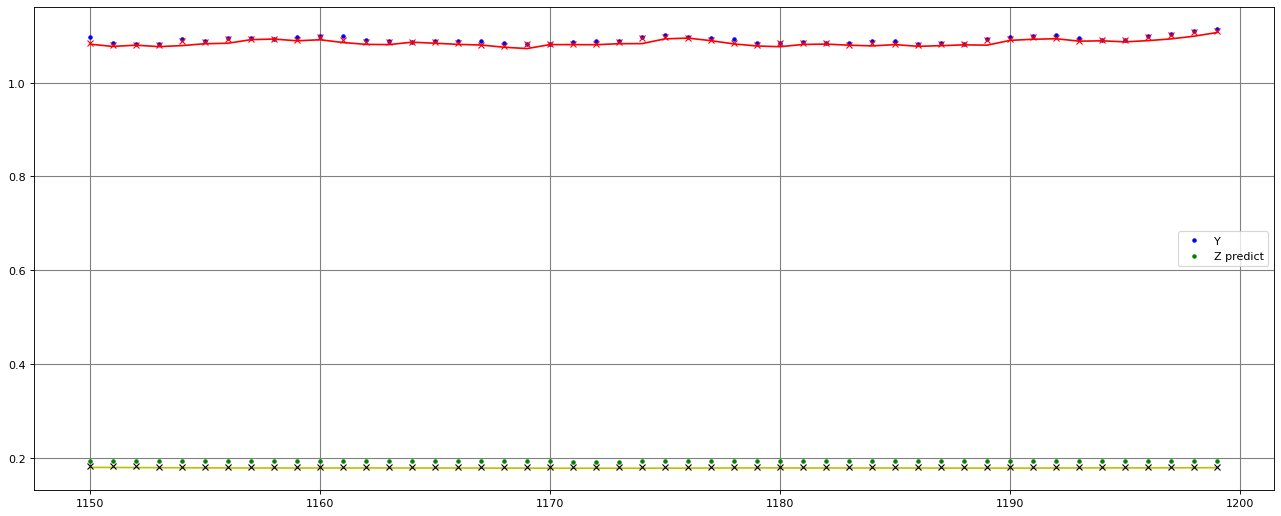

In [65]:
#Mn
space = 50
start = 1150
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(df_Y_Mn['High'][start:stop], 'b.')
plt.plot(df_Z_Mn['High'][start:stop], 'g.')

plt.plot(df_Y_Mn['Low'][start:stop], 'r')
plt.plot(df_Z_Mn['Low'][start:stop], 'y')

plt.plot(df_Y_Mn['Close'][start:stop], 'rx')
plt.plot(df_Z_Mn['Close'][start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['Y', 'Z predict'])
plt.show()

In [129]:
from keras.models import load_model

In [130]:
Load_model_Mn = load_model('data/LSTM_ohlc_Mn_ep2000.h5')
Load_model_Wk = load_model('data/LSTM_ohlc_Wk_ep2000.h5')
Load_model_D = load_model('data/LSTM_ohlc_D_ep2000.h5')

In [87]:
# Y_predict
Z_Mn = model_Mn.predict(X_train_Mn)
#print('Mn predict = ',Z_Mn)
Z_Wk = model_Mn.predict(X_train_Wk)
#print('Wk predict = ',Z_Wk)
Z_D = model_Mn.predict(X_train_D)
#print('D predict = ',Z_D)

#------- รวมข้อมูลพยากรณ์ ---------------
Z_Mn=np.concatenate((Z_Mn, Zpredict_Mn))
Z_Wk=np.concatenate((Z_Wk, Zpredict_Wk))
Z_D=np.concatenate((Z_D, Zpredict_D))

# split price ohlc  Mn    For compare  Y_train  VS Y_predict
OpenZ_Mn = Z_Mn[:,0:1]
HighZ_Mn = Z_Mn[:,1:2]
LowZ_Mn = Z_Mn[:,2:3]
CloseZ_Mn = Z_Mn[:,3:4]

OpenX_Mn = Y_train_Mn[:,0:1]
HighX_Mn= Y_train_Mn[:,1:2]
LowX_Mn= Y_train_Mn[:,2:3]
CloseX_Mn= Y_train_Mn[:,3:4]

# split price ohlc  Wk
OpenZ_Wk = Z_Wk[:,0:1]
HighZ_Wk = Z_Wk[:,1:2]
LowZ_Wk = Z_Wk[:,2:3]
CloseZ_Wk = Z_Wk[:,3:4]

OpenX_Wk = Y_train_Wk[:,0:1]
HighX_Wk= Y_train_Wk[:,1:2]
LowX_Wk= Y_train_Wk[:,2:3]
CloseX_Wk= Y_train_Wk[:,3:4]

# split price ohlc  D
OpenZ_D = Z_D[:,0:1]
HighZ_D = Z_D[:,1:2]
LowZ_D = Z_D[:,2:3]
CloseZ_D = Z_D[:,3:4]

OpenX_D = Y_train_D[:,0:1]
HighX_D= Y_train_D[:,1:2]
LowX_D= Y_train_D[:,2:3]
CloseX_D= Y_train_D[:,3:4]

In [88]:
print(len(Y_train_D))
print(len(Z_D))

1372
1373


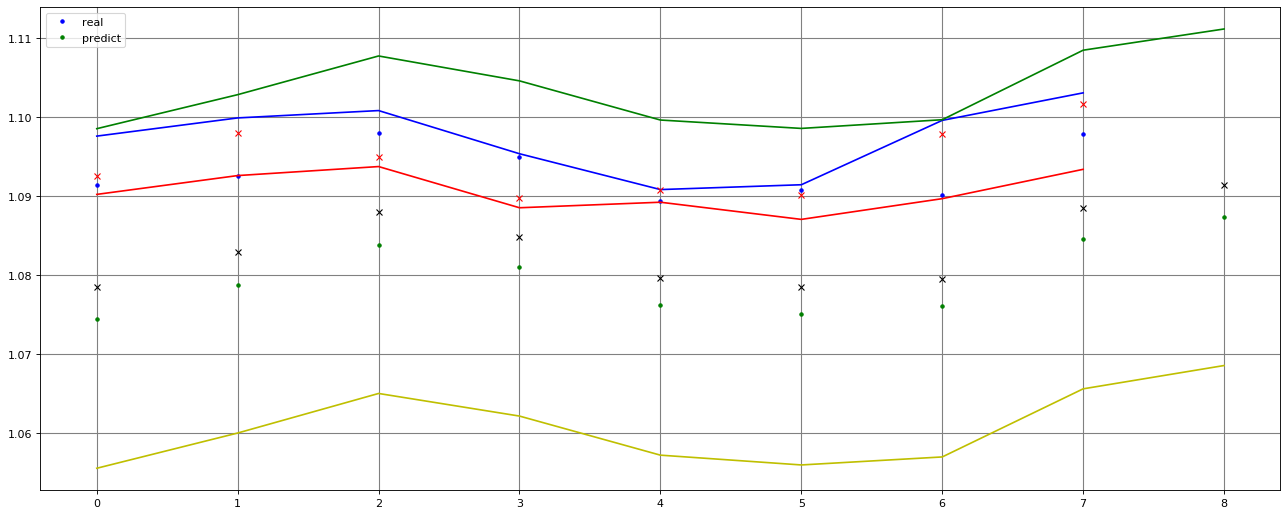

In [90]:
#Day
space = 10
start = 1364
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_D[start:stop], 'b.')
plt.plot(OpenZ_D[start:stop], 'g.')

plt.plot(HighX_D[start:stop], 'b')
plt.plot(HighZ_D[start:stop], 'g')

plt.plot(LowX_D[start:stop], 'r')
plt.plot(LowZ_D[start:stop], 'y')

plt.plot(CloseX_D[start:stop], 'rx')
plt.plot(CloseZ_D[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

In [93]:
print(Y_train_D[1370:,:])
print(Z_D[1370:,:])

[[1.09013 1.09954 1.08964 1.09781]
 [1.0978  1.10302 1.09335 1.10162]]
[[1.0760931 1.0996224 1.0569783 1.0795385]
 [1.084512  1.108414  1.0655906 1.0884855]
 [1.0873708 1.1110971 1.0685376 1.0913299]]


In [94]:
print(len(Y_train_Wk))
print(len(Z_Wk))

852
853


In [26]:
#Week
space = 50
start = 0
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_Wk[start:stop], 'b.')
plt.plot(OpenZ_Wk[start:stop], 'g.')

plt.plot(HighX_Wk[start:stop], 'b')
plt.plot(HighZ_Wk[start:stop], 'g')

plt.plot(LowX_Wk[start:stop], 'r')
plt.plot(LowZ_Wk[start:stop], 'y')

plt.plot(CloseX_Wk[start:stop], 'rx')
plt.plot(CloseZ_Wk[start:stop], 'k_')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()



NameError: name 'OpenX_Wk' is not defined

<Figure size 1600x640 with 0 Axes>

In [96]:
print(len(Y_train_Mn))
print(len(Z_Mn))

249
250


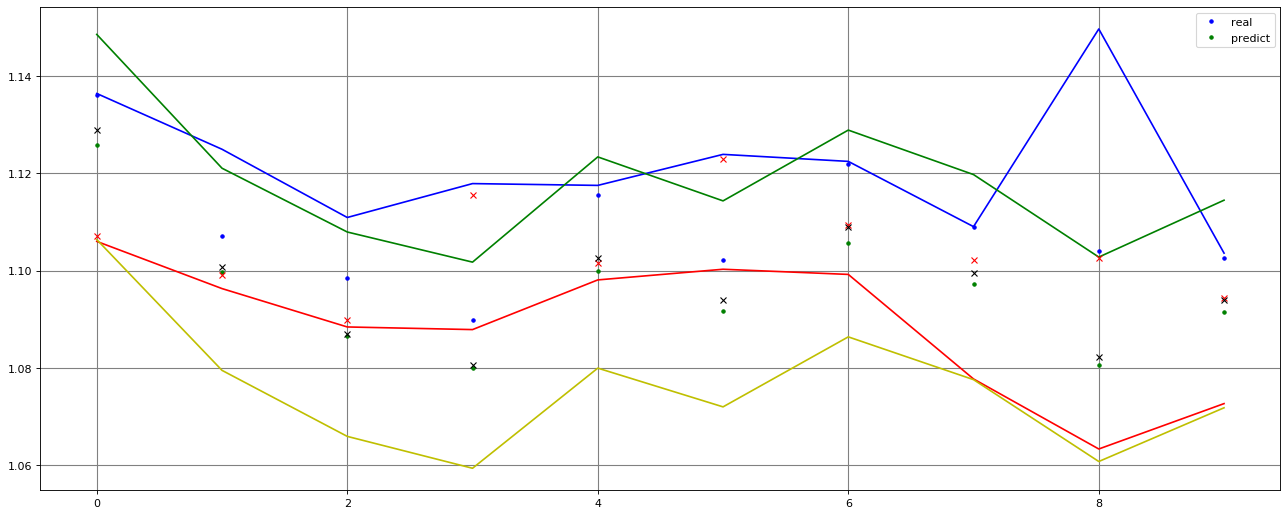

In [61]:
#month
space = 10
start = 239
stop = start + space
plt.figure(figsize=[20,8],dpi=80)

plt.plot(OpenX_Mn[start:stop], 'b.')
plt.plot(OpenZ_Mn[start:stop], 'g.')

plt.plot(HighX_Mn[start:stop], 'b')
plt.plot(HighZ_Mn[start:stop], 'g')

plt.plot(LowX_Mn[start:stop], 'r')
plt.plot(LowZ_Mn[start:stop], 'y')

plt.plot(CloseX_Mn[start:stop], 'rx')
plt.plot(CloseZ_Mn[start:stop], 'kx')

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

<class 'numpy.ndarray'>
[[1.0498  1.0728  1.0285  1.0643 ]
 [1.0643  1.0912  1.0438  1.0553 ]
 [1.05529 1.0591  1.0036  1.0101 ]
 [1.0101  1.0297  0.999   1.009  ]
 [1.00899 1.0414  0.9735  0.9773 ]
 [0.9773  1.00899 0.939   0.9708 ]
 [0.9708  0.99    0.9483  0.9621 ]
 [0.9621  0.975   0.9033  0.9122 ]
 [0.9122  0.941   0.885   0.9293 ]
 [0.9293  0.97    0.9273  0.9509 ]
 [0.9509  0.9599  0.9194  0.9238 ]
 [0.9238  0.9294  0.8871  0.8953 ]
 [0.8953  0.9035  0.8443  0.8839 ]
 [0.8839  0.8856  0.823   0.8404 ]
 [0.8404  0.8787  0.8371  0.8575 ]
 [0.8575  0.9431  0.8569  0.9421 ]
 [0.9421  0.9594  0.912   0.9265 ]
 [0.9265  0.9444  0.9017  0.9178 ]
 [0.9178  0.938   0.8741  0.8741 ]
 [0.8741  0.9088  0.8699  0.8916 ]
 [0.8916  0.9004  0.8503  0.8568 ]
 [0.8568  0.867   0.8413  0.8501 ]
 [0.8501  0.8823  0.8352  0.8743 ]
 [0.8743  0.924   0.8723  0.9162 ]
 [0.9162  0.9331  0.8826  0.9101 ]
 [0.9101  0.924   0.887   0.904  ]
 [0.904   0.9118  0.8737  0.8964 ]
 [0.8964  0.908   0.874   0.893

In [85]:
#print(Y_train_Mn)
print(Zpredict_Mn)

Y_full = np.concatenate((Y_train_Mn, Zpredict_Mn))
print(Y_full)

(249, 4)
(1, 4)
[[1.0729146 1.0953888 1.053161  1.0749054]]
[[1.0498     1.0728     1.0285     1.0643    ]
 [1.0643     1.0912     1.0438     1.0553    ]
 [1.05529    1.0591     1.0036     1.0101    ]
 [1.0101     1.0297     0.999      1.009     ]
 [1.00899    1.0414     0.9735     0.9773    ]
 [0.9773     1.00899    0.939      0.9708    ]
 [0.9708     0.99       0.9483     0.9621    ]
 [0.9621     0.975      0.9033     0.9122    ]
 [0.9122     0.941      0.885      0.9293    ]
 [0.9293     0.97       0.9273     0.9509    ]
 [0.9509     0.9599     0.9194     0.9238    ]
 [0.9238     0.9294     0.8871     0.8953    ]
 [0.8953     0.9035     0.8443     0.8839    ]
 [0.8839     0.8856     0.823      0.8404    ]
 [0.8404     0.8787     0.8371     0.8575    ]
 [0.8575     0.9431     0.8569     0.9421    ]
 [0.9421     0.9594     0.912      0.9265    ]
 [0.9265     0.9444     0.9017     0.9178    ]
 [0.9178     0.938      0.8741     0.8741    ]
 [0.8741     0.9088     0.8699     0.8916    ]
